In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, roc_auc_score




waze = pd.read_csv("../data/raw/waze.csv")


In [3]:
#EDA
waze.head()
waze.shape
waze.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [4]:
waze['label'].value_counts()
waze['label'].value_counts(normalize=True) * 100


label
retained    82.264494
churned     17.735506
Name: proportion, dtype: float64

In [5]:
waze.isnull().sum()


ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [7]:
waze['label'].fillna(waze['label'].mode()[0], inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_14852\1715564925.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['label'].fillna(waze['label'].mode()[0], inplace=True)


In [20]:
waze = waze[waze['sessions'] >= 0]
waze = waze[waze['drives'] >= 0]
waze = waze[waze['driven_km_drives'] >= 0]
waze = waze[waze['duration_minutes_drives'] >= 0]


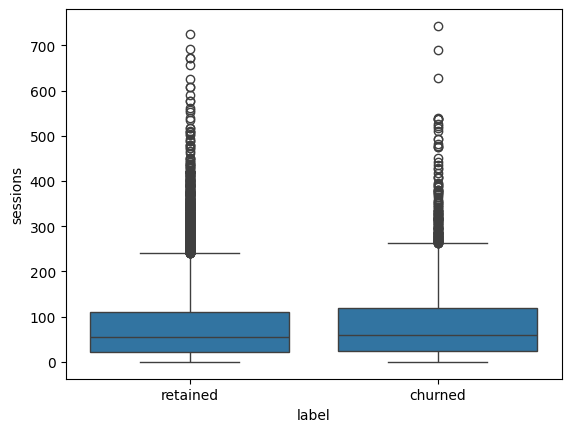

In [14]:
#VISUALISATIONS
sns.boxplot(x='label', y='sessions', data=waze)
plt.show()



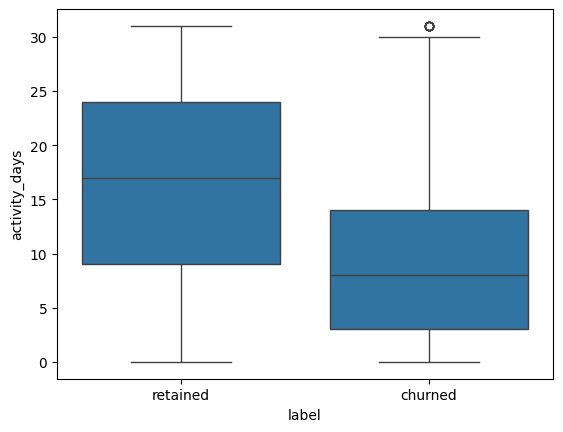

In [15]:
sns.boxplot(x='label', y='activity_days', data=waze)
plt.show()


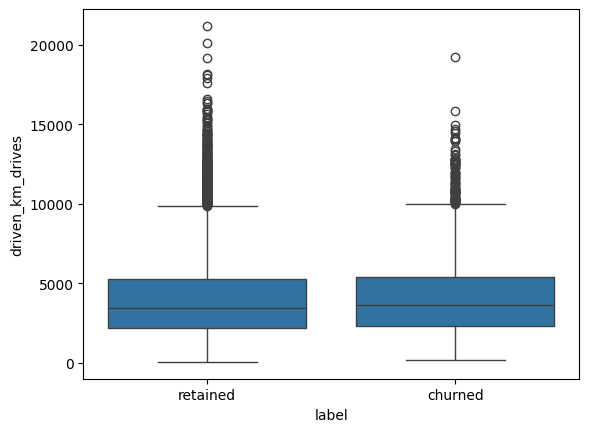

In [21]:
sns.boxplot(x='label', y='driven_km_drives', data=waze)
plt.show()


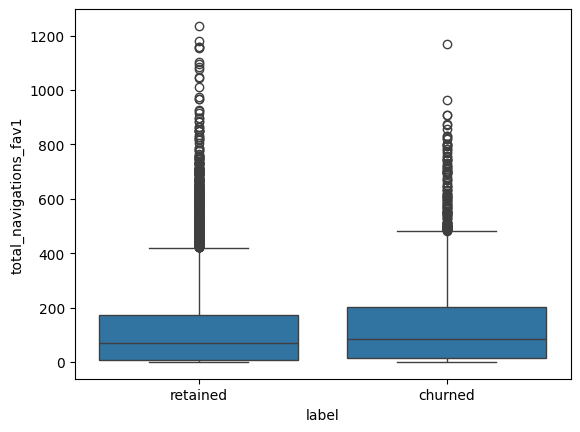

In [22]:
sns.boxplot(
    x='label',
    y='total_navigations_fav1',
    data=waze
)
plt.show()


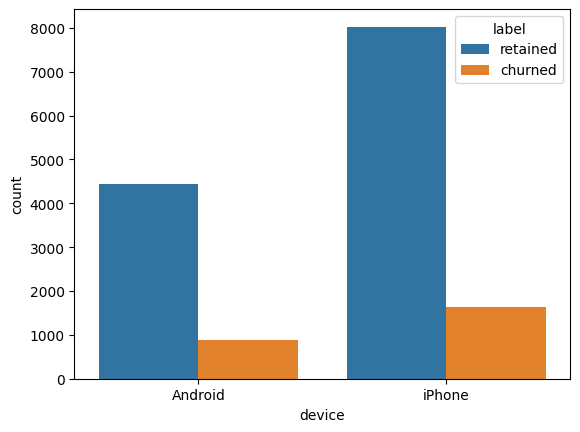

In [23]:
sns.countplot(x='device', hue='label', data=waze)
plt.show()


In [25]:
numeric_cols = waze.select_dtypes(include=['int64', 'float64'])


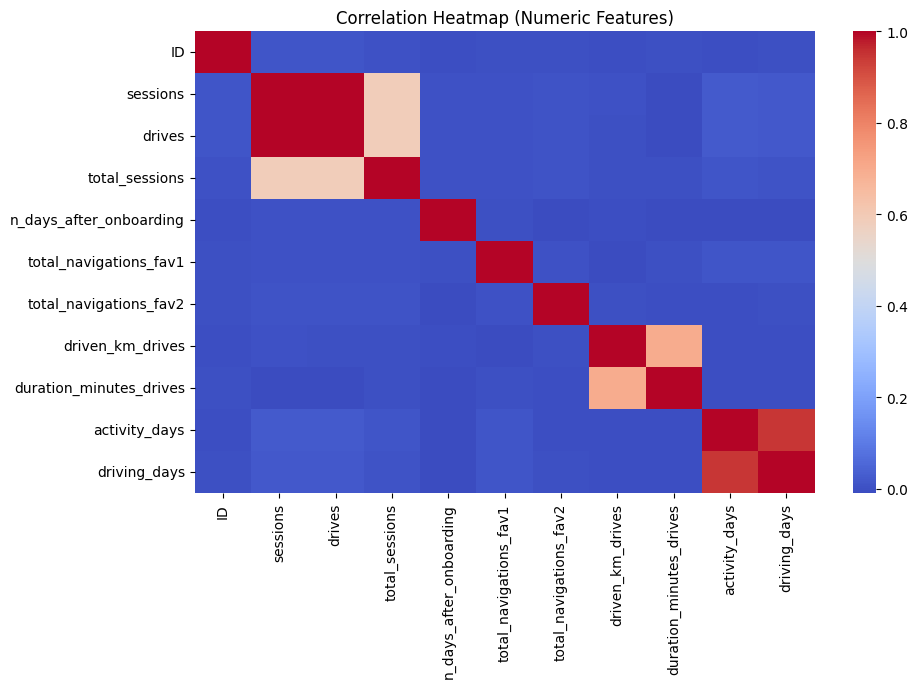

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


In [27]:
waze['label'].value_counts()
waze['device'].value_counts()


device
iPhone     9672
Android    5327
Name: count, dtype: int64

In [28]:
#CLEANED EDA DATA
waze.to_csv("../data/cleaned/waze_cleaned.csv", index=False)


In [2]:
#DATA ENGINEERING
waze['sessions_per_day'] = waze['sessions'] / waze['activity_days']
waze['sessions_per_day'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\760967103.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['sessions_per_day'].fillna(0, inplace=True)


In [4]:
waze['km_per_drive'] = waze['driven_km_drives'] / waze['drives']
waze['km_per_drive'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\1440368010.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['km_per_drive'].fillna(0, inplace=True)


In [7]:

waze['total_navigations'] = (
    waze['total_navigations_fav1'] +
    waze['total_navigations_fav2']
)



In [8]:
waze['favorite_ratio'] = (
    waze['total_navigations_fav1'] +
    waze['total_navigations_fav2']
) / waze['total_navigations']

waze['favorite_ratio'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\3073898619.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['favorite_ratio'].fillna(0, inplace=True)


In [11]:
waze['driving_consistency'] = (
    waze['driving_days'] / waze['activity_days']
)

waze['driving_consistency'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\4128950689.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['driving_consistency'].fillna(0, inplace=True)


In [13]:
# Inactive days since onboarding
waze['inactive_days'] = (
    waze['n_days_after_onboarding'] - waze['activity_days']
)

# Inactivity ratio (disengagement signal)
waze['inactive_ratio'] = (
    waze['inactive_days'] / waze['n_days_after_onboarding']
)

# Safety cleaning
waze['inactive_ratio'] = waze['inactive_ratio'].clip(lower=0)
waze['inactive_ratio'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\1820100760.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['inactive_ratio'].fillna(0, inplace=True)


In [14]:
# Driving habit consistency
waze['driving_consistency'] = (
    waze['driving_days'] / waze['activity_days']
)

waze['driving_consistency'].fillna(0, inplace=True)


C:\Users\adhit\AppData\Local\Temp\ipykernel_4900\1795445320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  waze['driving_consistency'].fillna(0, inplace=True)


In [15]:
waze[['inactive_ratio','label']].groupby('label').mean()


,inactive_ratio
label,
churned,0.974580
retained,0.971699


In [24]:
waze['device_android'] = (waze['device'] == 'Android').astype(int)


In [25]:
#STORE ENGINERRED DATA
waze.to_csv("../data/cleaned/waze_features.csv", index=False)


ML CLASSIFICATION MODEL- CHURN PREDICTION logistic regression

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import joblib


In [70]:
waze = pd.read_csv("../data/cleaned/waze_features.csv")


In [71]:
features = [
    'sessions_per_day',
    'km_per_drive',
    'favorite_ratio',
    'inactive_ratio',
    'driving_consistency',
    'device_android'
]

X = waze[features].copy()
y = waze['label'].copy()


In [72]:
# Drop rows where label is missing
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]


In [73]:
# Drop rows where label is missing
mask = y.notna()
X = X.loc[mask]
y = y.loc[mask]


In [74]:
if y.dtype == 'object':
    y = y.map({'retained': 0, 'churned': 1})


In [75]:
print("NaN in y:", y.isna().sum())


NaN in y: 0


In [76]:
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)

print("NaN in X:", X.isna().sum().sum())


NaN in X: 0


In [77]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("NaN after scaling:", np.isnan(X_scaled).sum())


NaN after scaling: 0


In [78]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [79]:
model_waze = LogisticRegression(max_iter=1000)
model_waze.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [80]:
joblib.dump(model_waze, "../models/waze_model.pkl")
joblib.dump(scaler, "../models/waze_scaler.pkl")


['../models/waze_scaler.pkl']

Built a logistic regression model to predict customer churn using behavioral engagement and inactivity features, achieving reliable ROC-AUC performance.